<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek37.do.txt  -->
<!-- dom:TITLE: Exercises week 37 -->

# Exercises week 37
## Implementing gradient descent for Ridge and ordinary Least Squares Regression
### Kjersti Stangeland, Fall 2025

## Learning goals

After having completed these exercises you will have:
1. Your own code for the implementation of the simplest gradient descent approach applied to ordinary least squares (OLS) and Ridge regression

2. Be able to compare the analytical expressions for OLS and Ridge regression with the gradient descent approach

3. Explore the role of the learning rate in the gradient descent approach and the hyperparameter $\lambda$ in Ridge regression

4. Scale the data properly

In [104]:
import numpy as np
import matplotlib.pyplot as plt

## Simple one-dimensional second-order polynomial

We start with a very simple function

$$
f(x)= 2-x+5x^2,
$$

defined for $x\in [-2,2]$. You can add noise if you wish. 

We are going to fit this function with a polynomial ansatz. The easiest thing is to set up a second-order polynomial and see if you can fit the above function.
Feel free to play around with higher-order polynomials.

In [105]:
n = 100
x = np.linspace(-2, 2, n)
y = 2 - x + 5*x**2

## Exercise 1, scale your data

Before fitting a regression model, it is good practice to normalize or
standardize the features. This ensures all features are on a
comparable scale, which is especially important when using
regularization. Here we will perform standardization, scaling each
feature to have mean 0 and standard deviation 1.

### 1a)

Compute the mean and standard deviation of each column (feature) in your design/feature matrix $\boldsymbol{X}$.
Subtract the mean and divide by the standard deviation for each feature.

We will also center the target $\boldsymbol{y}$ to mean $0$. Centering $\boldsymbol{y}$
(and each feature) means the model does not require a separate intercept
term, the data is shifted such that the intercept is effectively 0
. (In practice, one could include an intercept in the model and not
penalize it, but here we simplify by centering.)
Choose $n=100$ data points and set up $\boldsymbol{x}, \boldsymbol{y}$ and the design matrix $\boldsymbol{X}$.

In [106]:
def polynomial_features(x, p, intercept=True):
    n = len(x)

    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        for i in range(1, p + 1):
            X[:, i] = x ** i
    else:
        X = np.zeros((n, p))
        for i in range(0, p):
            X[:, i] = x ** (i + 1)

    return X

In [107]:
X = polynomial_features(x, 2, intercept=False)

In [108]:
# Standardize features (zero mean, unit variance for each feature)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # safeguard to avoid division by zero for constant features
X_norm = (X - X_mean) / X_std

# Center the target to zero mean (optional, to simplify intercept handling)
y_mean = y.mean()
y_centered = y - y_mean

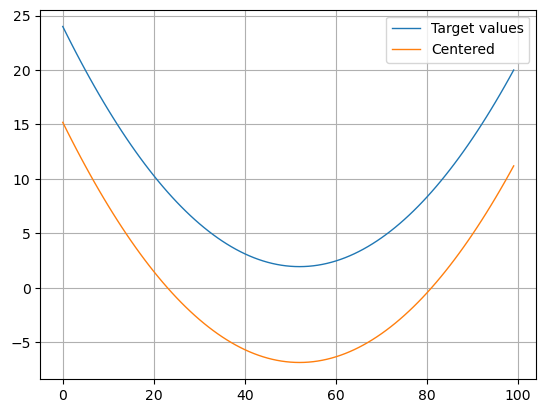

In [109]:
plt.plot(y, linewidth=1, label='Target values')
plt.plot(y_centered, linewidth=1, label='Centered')

plt.legend(loc='upper right')
plt.grid()

Fill in the necessary details. Do we need to center the $y$-values? 

After this preprocessing, each column of $\boldsymbol{X}_{\mathrm{norm}}$ has mean zero and standard deviation $1$
and $\boldsymbol{y}_{\mathrm{centered}}$ has mean 0. This makes the optimization landscape
nicer and ensures the regularization penalty $\lambda \sum_j
\theta_j^2$ in Ridge regression treats each coefficient fairly (since features are on the
same scale).

In [110]:
# Checking that it was correct
print(f'X_norm mean: {X_norm.mean(axis=0)}')
print()
print(f'X_norm STD: {X_norm.std(axis=0)}')
print()
print(f'y_centered mean: {y_centered.mean()}')

X_norm mean: [ 1.15463195e-16 -1.33226763e-16]

X_norm STD: [1. 1.]

y_centered mean: 1.4210854715202005e-15


## Exercise 2, calculate the gradients

Find the gradients for OLS and Ridge regression using the mean-squared error as cost/loss function.

__OLS Gradient__
$\nabla _{\theta} C_{OLS}(\theta) = \frac{2}{n}\bold{X^T} (\bold{X}\theta - \bold{y})$

__Ridge Gradient__
$\nabla _{\theta} C_{Ridge}(\theta) = 2(\frac{1}{n}\bold{X^T}(\bold{X}\theta - \bold{y}) + \lambda \theta)$

The analytical solution for the optimal parameters are found when the gradient is put to zero.

__OLS optimal parameters__
$\hat{\theta}_{OLS} = (\bold{X^T}\bold{X})^{-1}\bold{X^T} \bold{y}$

__Ridge optimal parameters__
$\hat{\theta}_{Ridge} = (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T} \bold{y}$

## Exercise 3, using the analytical formulae for OLS and Ridge regression to find the optimal paramters $\boldsymbol{\theta}$

In [111]:
# Set regularization parameter, either a single value or a vector of values
# Note that lambda is a python keyword. The lambda keyword is used to create small, single-expression functions without a formal name. These are often called "anonymous functions" or "lambda functions."
lamb = 0.3

n_features = 2

# Analytical form for OLS and Ridge solution: theta_Ridge = (X^T X + lambda * I)^{-1} X^T y and theta_OLS = (X^T X)^{-1} X^T y
I = np.eye(n_features)

theta_closed_form_Ridge = np.linalg.inv(X_norm.T @ X_norm + lamb * I) @ (X_norm.T @ y_centered)
theta_closed_form_OLS = np.linalg.inv(X_norm.T @ X_norm) @ (X_norm.T @ y_centered)

This computes the Ridge and OLS regression coefficients directly. The identity
matrix $I$ has the same size as $X^T X$. It adds $\lambda$ to the diagonal of $X^T X$ for Ridge regression. We
then invert this matrix and multiply by $X^T y$. The result
for $\boldsymbol{\theta}$  is a NumPy array of shape (n$\_$features,) containing the
fitted parameters $\boldsymbol{\theta}$.

### 3a)

Finalize, in the above code, the OLS and Ridge regression determination of the optimal parameters $\boldsymbol{\theta}$.

In [112]:
print("Closed-form Ridge coefficients:")
print(theta_closed_form_Ridge)
print()
print("Closed-form OLS coefficients:")
print(theta_closed_form_OLS)

Closed-form Ridge coefficients:
[-1.16281741  6.06420425]

Closed-form OLS coefficients:
[-1.16630586  6.08239686]


### 3b)

Explore the results as function of different values of the hyperparameter $\lambda$. See for example exercise 4 from week 36.

In [113]:
lambdas = np.logspace(-5, 5, 8)

theta_closed_formRidge = []
for l in lambdas:
    theta_ridge = np.linalg.inv((X.T @ X) + (l * I)) @ X.T @ y 
    theta_closed_formRidge.append(theta_ridge) 

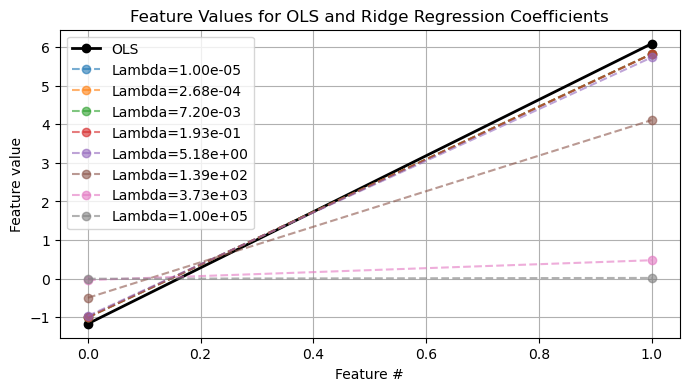

In [114]:
plt.figure(figsize=(8, 4))

plt.plot(theta_closed_form_OLS, marker='o', color='black', label='OLS', linewidth=2)

for idx, t in enumerate(theta_closed_formRidge):
    plt.plot(t, linestyle='--', marker='o', alpha=0.6, label=f'Lambda={lambdas[idx]:.2e}')

plt.xlabel('Feature #')
plt.ylabel('Feature value')
plt.title('Feature Values for OLS and Ridge Regression Coefficients')
plt.legend(loc='upper left')
plt.grid()

Larger hyperparameters penalize the coefficients more. When $\lambda =0$ Ridge gives the same results as OLS.

## Exercise 4, Implementing the simplest form for gradient descent

Alternatively, we can fit the ridge regression model using gradient
descent. This is useful to visualize the iterative convergence and is
necessary if $n$ and $p$ are so large that the closed-form might be
too slow or memory-intensive. We derive the gradients from the cost
functions defined above. Use the gradients of the Ridge and OLS cost functions with respect to
the parameters  $\boldsymbol{\theta}$ and set up (using the template below) your own gradient descent code for OLS and Ridge regression.

Below is a template code for gradient descent implementation of ridge:

In [115]:
etas = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]   # different learning rates
num_iters = 1000

theta_history = {}

for eta in etas:
    theta_gd_OLS = np.zeros(n_features)
    mse_history = []

    for t in range(num_iters):
        grad_OLS = (2/n) * X_norm.T @ (X_norm @ theta_gd_OLS - y_centered)
        theta_gd_OLS -= eta * grad_OLS

        mse = np.mean((y_centered - (X_norm @ theta_gd_OLS))**2)
        mse_history.append(mse)

    theta_history[eta] = mse_history

### 4a)

Write first a gradient descent code for OLS only using the above template.
Discuss the results as function of the learning rate parameters and the number of iterations

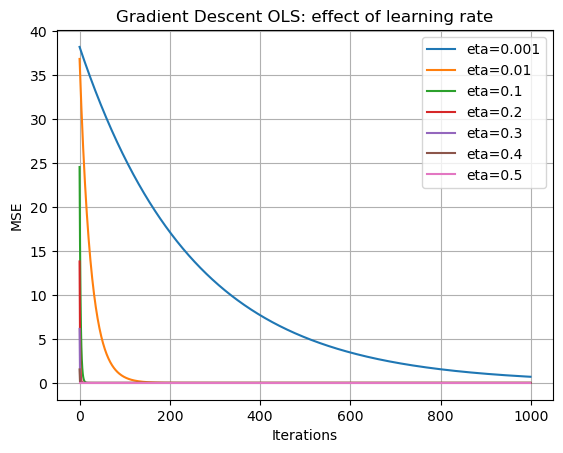

In [116]:
for eta, mse in theta_history.items():
    plt.plot(mse, label=f"eta={eta}")
    
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Gradient Descent OLS: effect of learning rate')
plt.legend()
plt.grid()

### 4b)

Write then a similar code for Ridge regression using the above template.
Try to add a stopping parameter as function of the number iterations and the difference between the new and old $\theta$ values. How would you define a stopping criterion?

In [117]:
etas = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]   # different learning rates
num_iters = 10000
lamb = 0.3

tol = 1e-6  # minimum improvement to contninue iterations
print(f'Change in theta must be larger than {tol} for loop to continue.')
print()

theta_history = {}

for eta in etas:
    print(f'Current learning rate: {eta}')
    theta_gd_Ridge = np.zeros(n_features)
    mse_history = []

    for t in range(num_iters):
        grad_Ridge = (2/n) * X_norm.T @ (X_norm @ theta_gd_Ridge - y_centered) + 2*lamb*theta_gd_Ridge

        new_theta = theta_gd_Ridge - eta*grad_Ridge

        if np.linalg.norm(new_theta - theta_gd_Ridge) < tol:
            print(f'Breaking the loop at iteration {t}')
            print()
            break

        theta_gd_Ridge -= eta * grad_Ridge

        mse = np.mean((y_centered - (X_norm @ theta_gd_Ridge))**2)
        mse_history.append(mse)

    theta_history[eta] = mse_history

Change in theta must be larger than 1e-06 for loop to continue.

Current learning rate: 0.001
Breaking the loop at iteration 3621

Current learning rate: 0.01
Breaking the loop at iteration 446

Current learning rate: 0.1
Breaking the loop at iteration 47

Current learning rate: 0.2
Breaking the loop at iteration 21

Current learning rate: 0.3
Breaking the loop at iteration 10

Current learning rate: 0.4
Breaking the loop at iteration 5

Current learning rate: 0.5
Breaking the loop at iteration 13



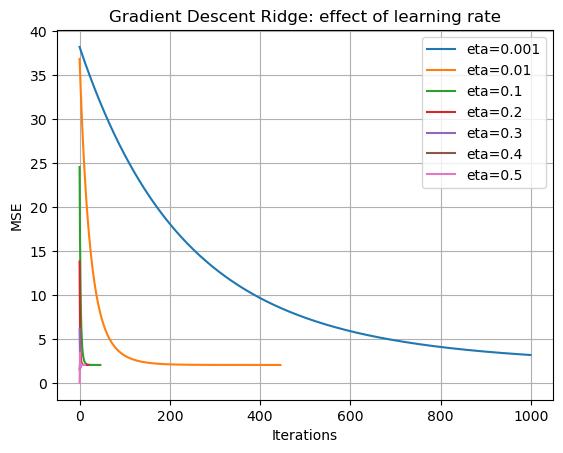

In [118]:
for eta, mse in theta_history.items():
    plt.plot(mse[:1000], label=f"eta={eta}")
    
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Gradient Descent Ridge: effect of learning rate')
plt.legend()
plt.grid()

Above we see that too small learning rates result in many iterations before convergence.

## Exercise 5, Ridge regression and a new Synthetic Dataset

We create a synthetic linear regression dataset with a sparse
underlying relationship. This means we have many features but only a
few of them actually contribute to the target. In our example, we’ll
use 10 features with only 3 non-zero weights in the true model. This
way, the target is generated as a linear combination of a few features
(with known coefficients) plus some random noise. The steps we include are:

Decide on the number of samples and features (e.g. 100 samples, 10 features).
Define the **true** coefficient vector with mostly zeros (for sparsity). For example, we set $\hat{\boldsymbol{\theta}} = [5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0]$, meaning only features 0, 1, and 6 have a real effect on y.

Then we sample feature values for $\boldsymbol{X}$ randomly (e.g. from a normal distribution). We use a normal distribution so features are roughly centered around 0.
Then we compute the target values $y$ using the linear combination $\boldsymbol{X}\hat{\boldsymbol{\theta}}$ and add some noise (to simulate measurement error or unexplained variance).

Below is the code to generate the dataset:

In [119]:
# Set random seed for reproducibility
np.random.seed(0)

# Define dataset size
n_samples = 100
n_features = 10

# Define true coefficients (sparse linear relationship)
theta_true = np.array([5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0])

# Generate feature matrix X (n_samples x n_features) with random values
X = np.random.randn(n_samples, n_features)  # standard normal distribution

# Generate target values y with a linear combination of X and theta_true, plus noise
noise = 0.5 * np.random.randn(n_samples)    # Gaussian noise
y = X @ theta_true + noise

This code produces a dataset where only features 0, 1, and 6
significantly influence $\boldsymbol{y}$. The rest of the features have zero true
coefficient. For example, feature 0 has
a true weight of 5.0, feature 1 has -3.0, and feature 6 has 2.0, so
the expected relationship is:

$$
y \approx 5 \times x_0 \;-\; 3 \times x_1 \;+\; 2 \times x_6 \;+\; \text{noise}.
$$

You can remove the noise if you wish to. 

Try to fit the above data set using OLS and Ridge regression with the analytical expressions and your own gradient descent codes.

If everything worked correctly, the learned coefficients should be
close to the true values [5.0, -3.0, 0.0, …, 2.0, …] that we used to
generate the data. Keep in mind that due to regularization and noise,
the learned values will not exactly equal the true ones, but they
should be in the same ballpark.  Which method (OLS or Ridge) gives the best results?

In [120]:
# Standardize features (zero mean, unit variance for each feature)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # safeguard to avoid division by zero for constant features
X_norm = (X - X_mean) / X_std

# Center the target to zero mean (optional, to simplify intercept handling)
y_mean = y.mean()
y_centered = y - y_mean

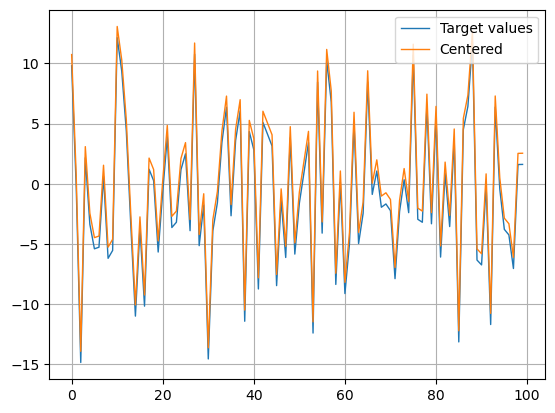

In [121]:
plt.plot(y, linewidth=1, label='Target values')
plt.plot(y_centered, linewidth=1, label='Centered')

plt.legend(loc='upper right')
plt.grid()

In [122]:
# OLS and Ridge

lamb = 0.1

# Analytical form for OLS and Ridge solution: theta_Ridge = (X^T X + lambda * I)^{-1} X^T y and theta_OLS = (X^T X)^{-1} X^T y
I = np.eye(n_features)

theta_closed_form_Ridge = np.linalg.inv(X_norm.T @ X_norm + lamb * I) @ (X_norm.T @ y_centered)
theta_closed_form_OLS = np.linalg.inv(X_norm.T @ X_norm) @ (X_norm.T @ y_centered)

theta_closed_form_OLS_unscaled = theta_closed_form_OLS / X_std
theta_closed_form_Ridge_unscaled = theta_closed_form_Ridge / X_std

print("Closed-form Ridge coefficients:")
print(theta_closed_form_Ridge)
print()
print("Closed-form OLS coefficients:")
print(theta_closed_form_OLS)
print()
print("True coefficients:")
print(theta_true)


Closed-form Ridge coefficients:
[ 5.02716096e+00 -2.88896347e+00 -1.55169486e-02  1.52287662e-01
 -6.93302234e-02 -4.47229113e-02  1.76836298e+00  4.62139092e-03
  4.41380481e-02 -4.96664608e-02]

Closed-form OLS coefficients:
[ 5.03241281e+00 -2.89258175e+00 -1.55189951e-02  1.51795012e-01
 -6.83299260e-02 -4.40147965e-02  1.76999871e+00  4.37643569e-03
  4.52550260e-02 -4.97610000e-02]

True coefficients:
[ 5. -3.  0.  0.  0.  0.  2.  0.  0.  0.]


In [123]:
y_OLS = X_norm @ theta_closed_form_OLS
y_Ridge = X_norm @ theta_closed_form_Ridge

mse_OLS = np.mean((y_centered - y_OLS)**2)
mse_Ridge = np.mean((y_centered - y_Ridge)**2)

print(f'MSE of closed form OLS: {mse_OLS}')
print(f'MSE of closed form Ridge: {mse_Ridge}')

MSE of closed form OLS: 0.16850284715175223
MSE of closed form Ridge: 0.16854247157973679


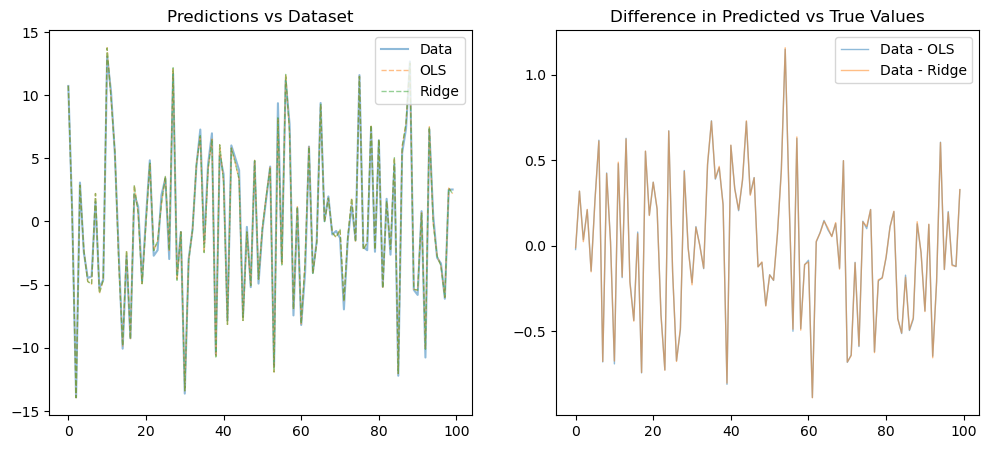

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(y_centered, alpha=0.5, label='Data')
ax[0].plot(y_OLS, linewidth=1, linestyle='--', alpha=0.5, label='OLS')
ax[0].plot(y_Ridge, linewidth=1, linestyle='--', alpha=0.5, label='Ridge')
ax[0].set_title('Predictions vs Dataset')
ax[0].legend()

ax[1].plot(y_centered - y_OLS, linewidth=1, alpha=0.5, label='Data - OLS')
ax[1].plot(y_centered - y_Ridge, linewidth=1, alpha=0.5, label='Data - Ridge')
ax[1].set_title('Difference in Predicted vs True Values')
ax[1].legend()

In [125]:
# Gradient descent method

eta = 0.01
num_iters = 2000

mse_history_OLS = []
mse_history_Ridge = []

theta_gd_OLS = np.zeros(n_features)
theta_gd_Ridge = np.zeros(n_features)

for t in range(num_iters):
    grad_OLS = (2/n_samples) * X_norm.T @ (X_norm @ theta_gd_OLS - y_centered)
    theta_gd_OLS -= eta * grad_OLS

    grad_Ridge = (2/n_samples) * X_norm.T @ (X_norm @ theta_gd_Ridge - y_centered) + 2 * lamb * theta_gd_Ridge
    theta_gd_Ridge -= eta * grad_Ridge

    mse_O = np.mean((y_centered - (X_norm @ theta_gd_OLS))**2)
    mse_history_OLS.append(mse_O)

    mse_R = np.mean((y_centered - (X_norm @ theta_gd_Ridge))**2)
    mse_history_Ridge.append(mse_R)

In [126]:
print("Closed-form Ridge coefficients:")
print(theta_closed_form_Ridge)
print()
print("Closed-form OLS coefficients:")
print(theta_closed_form_OLS)
print()
print("GD learned Ridge coefficients:")
print(theta_gd_Ridge)
print()
print("GD learned OLS coefficients:")
print(theta_gd_OLS)
print()
print("True coefficients:")
print(theta_true)

Closed-form Ridge coefficients:
[ 5.02716096e+00 -2.88896347e+00 -1.55169486e-02  1.52287662e-01
 -6.93302234e-02 -4.47229113e-02  1.76836298e+00  4.62139092e-03
  4.41380481e-02 -4.96664608e-02]

Closed-form OLS coefficients:
[ 5.03241281e+00 -2.89258175e+00 -1.55189951e-02  1.51795012e-01
 -6.83299260e-02 -4.40147965e-02  1.76999871e+00  4.37643569e-03
  4.52550260e-02 -4.97610000e-02]

GD learned Ridge coefficients:
[ 4.55939394 -2.57368578 -0.01541807  0.18880688 -0.14678708 -0.1008156
  1.62042026  0.02538038 -0.04540125 -0.04206634]

GD learned OLS coefficients:
[ 5.03241281e+00 -2.89258175e+00 -1.55189951e-02  1.51795012e-01
 -6.83299260e-02 -4.40147965e-02  1.76999871e+00  4.37643569e-03
  4.52550260e-02 -4.97610000e-02]

True coefficients:
[ 5. -3.  0.  0.  0.  0.  2.  0.  0.  0.]


Maybe I have done something wrong, because I'm not super impressed by the above results. 

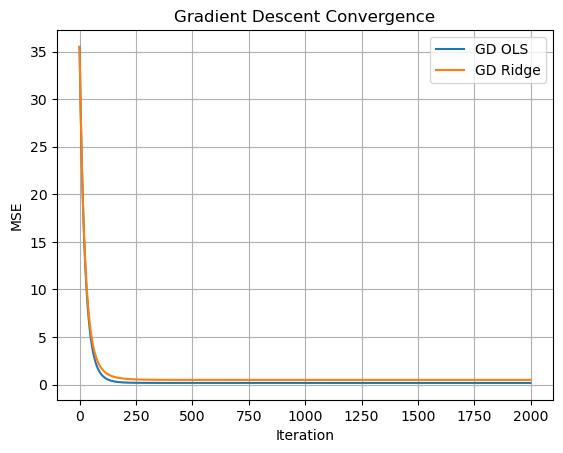

In [127]:
plt.plot(mse_history_OLS, label="GD OLS")
plt.plot(mse_history_Ridge, label="GD Ridge")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.title("Gradient Descent Convergence")
plt.grid(True)